In [1]:
import sys
import scipy
import numpy
import matplotlib
import pandas
import sklearn

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
import numpy as np
#from sklearn import  cross_validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
# Load Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']
df = pd.read_csv(url, names=names)

In [14]:
df.head()

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [15]:
df.info

<bound method DataFrame.info of      clump_thickness  uniform_cell_size  uniform_cell_shape  \
0                  5                  1                   1   
1                  5                  4                   4   
2                  3                  1                   1   
3                  6                  8                   8   
4                  4                  1                   1   
..               ...                ...                 ...   
694                3                  1                   1   
695                2                  1                   1   
696                5                 10                  10   
697                4                  8                   6   
698                4                  8                   8   

     marginal_adhesion  single_epithelial_size bare_nuclei  bland_chromatin  \
0                    1                       2           1                3   
1                    5                       7       

In [16]:
# Preprocess the data
df.replace('?',-99999, inplace=True)
print(df.axes)

df.drop(['id'], 1, inplace=True)

[RangeIndex(start=0, stop=699, step=1), Index(['clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]


KeyError: "['id'] not found in axis"

In [17]:
# Let explore the dataset and do a few visualizations
print(df.loc[10])

# Print the shape of the dataset
print(df.shape)

clump_thickness           1
uniform_cell_size         1
uniform_cell_shape        1
marginal_adhesion         1
single_epithelial_size    1
bare_nuclei               1
bland_chromatin           3
normal_nucleoli           1
mitoses                   1
class                     2
Name: 10, dtype: object
(699, 10)


In [18]:
# Describe the dataset
print(df.describe())

       clump_thickness  uniform_cell_size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  single_epithelial_size  bland_chromatin  \
count         699.000000              699.000000       699.000000   
mean            2.806867                3.216023         3.437768   
std             2.855379                2.214300         2.438364   
min             1.000000                1.000000         1.000000   
25%             1.000000                2.000000         2.000000   


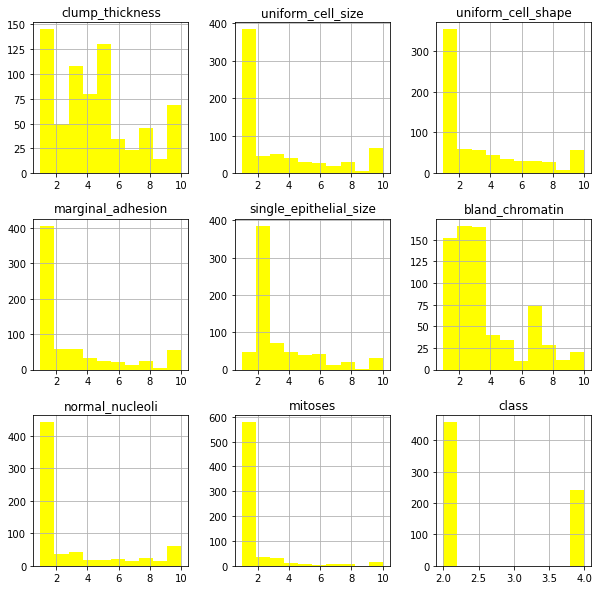

In [25]:
# Plot histograms for each variable
df.hist(figsize = (10, 10), color="yellow")
plt.show()

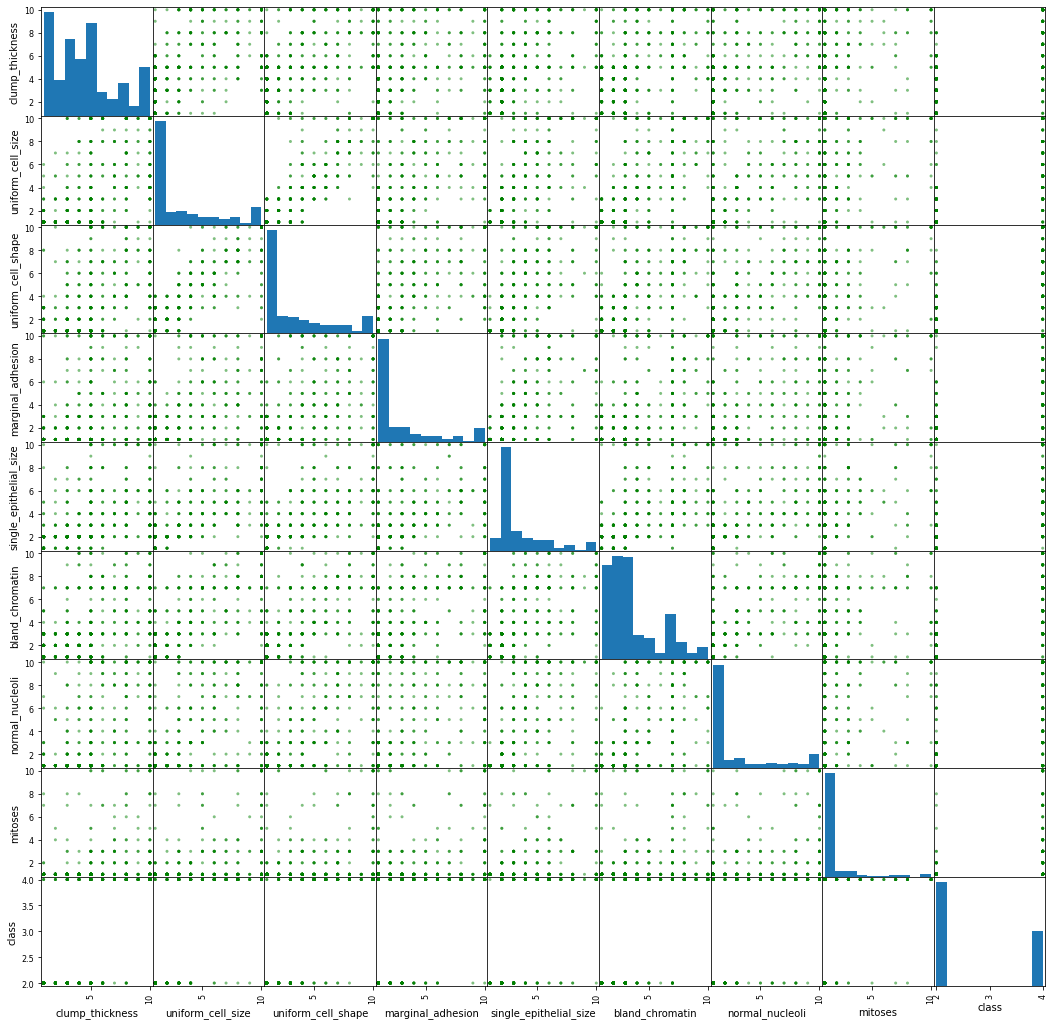

In [28]:
# Create scatter plot matrix
scatter_matrix(df, figsize = (18,18), color="green")
plt.show()

In [48]:
X=df.loc[:,df.columns!='class']
y=df.loc[:,df.columns=='class']

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (559, 9) (559, 1)
Test set: (140, 9) (140, 1)


In [47]:
seed = 8
scoring = 'accuracy'

In [51]:
# Define models to train
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state = seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

D:\DM\DV\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
D:\DM\DV\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\DM\DV\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\DM\DV\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y t

KNN: 0.976753 (0.016061)
SVM: 0.651104 (0.064330)


D:\DM\DV\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\DM\DV\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\DM\DV\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\DM\DV\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\DM\DV\lib\site-packages\sklearn\utils\validation.py:7

In [52]:
# Make predictions on validation dataset

for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))

KNN
0.9428571428571428
              precision    recall  f1-score   support

           2       0.95      0.97      0.96        94
           4       0.93      0.89      0.91        46

    accuracy                           0.94       140
   macro avg       0.94      0.93      0.93       140
weighted avg       0.94      0.94      0.94       140

SVM
0.6714285714285714
              precision    recall  f1-score   support

           2       0.67      1.00      0.80        94
           4       0.00      0.00      0.00        46

    accuracy                           0.67       140
   macro avg       0.34      0.50      0.40       140
weighted avg       0.45      0.67      0.54       140



<ipython-input-52-8b9de39470f4>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(X_train, y_train)
D:\DM\DV\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\DM\DV\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
clf = SVC()

clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

example_measures = np.array([[4,2,1,1,1,2,3,2,1]])
example_measures = example_measures.reshape(len(example_measures), -1)
prediction = clf.predict(example_measures)
print(prediction)

0.6714285714285714
[2]


D:\DM\DV\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
